# Integrantes do Projeto

Este projeto foi desenvolvido pelos seguintes alunos do módulo V - Machine Learning II, do curso de Data Science da escola Ada Tech, em parceria com o projeto Santander Coders:

- Carlos Eduardo
- Guilherme Araujo
- Guilherme de Almeida
- Laura Campos
- Luiz Henrique

## Curso e Parceria
O curso é ministrado pelo professor Tiago Marto, que guiou os alunos através do processo de aprendizado prático e teórico necessário para o desenvolvimento deste projeto. A parceria entre a Ada Tech e o Santander Coders visa fornecer uma formação prática e voltada para a indústria, preparando os alunos para enfrentar desafios reais do mundo dos dados.

## Objetivo do Curso
O curso tem como objetivo desenvolver competências técnicas em Data Science, permitindo que os alunos apliquem técnicas de machine learning e análise de dados em problemas reais, como é o caso deste projeto de detecção de intenção de compra em uma loja online e a caracterização das sessões que foram finalizadas com compra.

# Detecção de Intenção de Compra no E-commerce e Clusterização das Sessões com Conversão

## Contexto
O aumento do uso do E-commerce nos últimos anos criou novas oportunidades de mercado, mas as taxas de conversão não acompanharam esse crescimento, gerando a necessidade de soluções que ofereçam promoções personalizadas aos consumidores online. No varejo físico, vendedores usam sua experiência para influenciar as taxas de conversão e vendas, e as empresas de E-commerce precisam investir em sistemas de detecção precoce e previsão comportamental para imitar esse comportamento de forma online.
</br></br>

## Descrição do Dataset
Este projeto utiliza um dataset sintético denominado ["Online Shoppers Purchasing Intention"](https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset), disponibilizado por Sakar e Kastro (2018), que consiste nos dados de um varejista online. O conjunto de dados consiste em vetores de características de 12.330 sessões, sendo que cada sessão pertence a um usuário diferente em um período de 1 ano, para evitar tendências específicas de campanhas, dias especiais, perfis de usuários ou períodos.
</br></br>

### Visão Geral do Dataset
- **Número de Sessões**: 12,330
- **Características**: 18
- **Sessões com conversão**: Aproximadamente 15%
</br></br>

### Detalhes das Variáveis
#### Variáveis numéricas
- **Administrative**: Número de páginas de gerenciamento da conta visitadas.
- **Administrative_Duration**: Tempo (seg) de permanência em páginas de gerenciamento da conta.
- **Informational**: Número de páginas visitadas sobre o site, comunicação e informação de endereço.
- **Informational_Duration**: Tempo (seg) de permanência em páginas sobre o site, comunicação e informação de endereço.
- **ProductRelated**: Número de páginas visitadas relacionadas a produtos.
- **ProductRelated_Duration**: Tempo (seg) de permanência em páginas relacionadas a produtos.
- **BounceRates****: Porcentagem média de visitantes que entram no site por uma página e saem sem realizar outras ações.
- **ExitRates****: Porcentagem média de visualizações de uma página específica que foram as últimas na sessão.
- **PageValues****: valor médio de uma página que o usuário visitou antes de completar uma transação de e-commerce
- **SpecialDay**: Indicador da proximidade do momento da visita a um dia especial (por exemplo, Dia das Mães, Dia dos Namorados).
</br></br>

** As variáveis "BounceRate," "ExitRate," e "PageValue," são métricas medidas pelo "Google Analytics" para cada página do site de E-commerce e podem ser armazenadas no banco de dados do aplicativo e atualizadas automaticamente em intervalos regulares.
</br></br>

#### Variáveis categóricas
- **Month**: Mês da data da visita.
- **OperatingSystems**: Sistema Operacional utilizado pelo visitante.
- **Browser**: Browser utilizado pelo visitante.
- **Region**: Região geográfica de onde a sessão foi iniciada pelo visitante.
- **TrafficType**: Tipo de tráfego pelo qual o visitante chegou ao site (por exemplo, banner, SMS, direto).
- **VisitorType**: Tipo do visitante (Novo, Retornante ou Outro).
- **Weekend**: Indicador binário se a data da visita é ou não um fim de semana.
- **Revenue (Target)**: Indicador se a visita foi finalizada com uma transação ou não.
</br></br>

## Objetivos do Projeto
1) Entender o problema de negócio ao qual o dataset escolhido se insere.

2) Desenvolver  uma análise de segmentação das sessões que terminaram em conversão, a partir de agrupamentos no conjunto de dados.

3) Desenvolver um modelo de machine learning capaz de identificar as sessões com conversão em dados de e-commerce.
</br></br>

Estes objetivos buscam entender os diferentes tipos de sessões que obtiveram sucesso na venda, e também servir como uma ferramenta para melhorar as taxas de conversão do E-commerce, auxiliando na criação de soluções que ofereçam promoções personalizadas aos consumidores online.
</br></br>

## Estrutura do Projeto
Para atingir os objetivos do projeto este notebook seguirá os seguintes passos para abordar o problema de detecção de fraudes:
1. Análise Exploratória de Dados (EDA) para entender as características e a distribuição das sessões.
2. Clusterização dos dados para análise de diferentes tipos de sessões com conversão.
3. Comparação de diferentes modelos de classificação para identificar o mais eficaz na detecção de conversão.
</br></br>

A partir daqui, o notebook procederá com a carga e análise dos dados, seguido pela análise de segmentação e a análise preditiva.

# 1 - Carregamento dos dados e Análise Exploratória de dados

## Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from collections import Counter
from sklearn.model_selection import (
    train_test_split, KFold, StratifiedKFold, cross_validate,
    RepeatedStratifiedKFold, GridSearchCV, RandomizedSearchCV
)
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    r2_score, mean_absolute_error, mean_squared_error, confusion_matrix,
    accuracy_score, precision_score, recall_score, f1_score, classification_report,
    ConfusionMatrixDisplay, make_scorer, silhouette_score
)
from mlxtend.plotting import plot_confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours
from imblearn.combine import SMOTEENN
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import plotly.express as px
from sklearn.feature_selection import SelectKBest, chi2
from xgboost import XGBClassifier, plot_importance
from sklearn.cluster import KMeans
from scipy.stats import mannwhitneyu
import plotly.figure_factory as ff

# Configurações para ignorar avisos desnecessários
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')


## Caminhos do DF

In [ ]:
df = pd.read_csv('../Data/online_shoppers_intention.csv')

## Análises Iniciais

Primeiro exploramos os dados como um todo para verificar se existia algum tipo de problema com o dataset, como dados nulos, dados inconsistentes e outliers. Observamos as variáveis, os seus tipos, distribuições e correlações.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
df.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


In [ ]:
df['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [ ]:
df.shape

(12330, 18)

In [ ]:
df['Revenue'].value_counts(normalize = True)

Revenue
False    0.845255
True     0.154745
Name: proportion, dtype: float64

**Conclusões**:
 - A base é desbalanceada
 - As variáveis possuem ordens de grandeza distintas
 - A variável Month tem apenas 10 meses, não existem valores para os meses de Janeiro e Abril
 - Ausência de valores nulos
 - Apesar das variáveis OperatingSystems, Browser, Region, TrafficType estarem com o tipo numérico no dataset, elas representam categorias e por isso devemos fazer a transformação dessas variáveis

Pensando nessas conclusões, teremos que fazer tratamentos de balanceamento e escalonamento.

##Bloco 1: Análise das correlações.

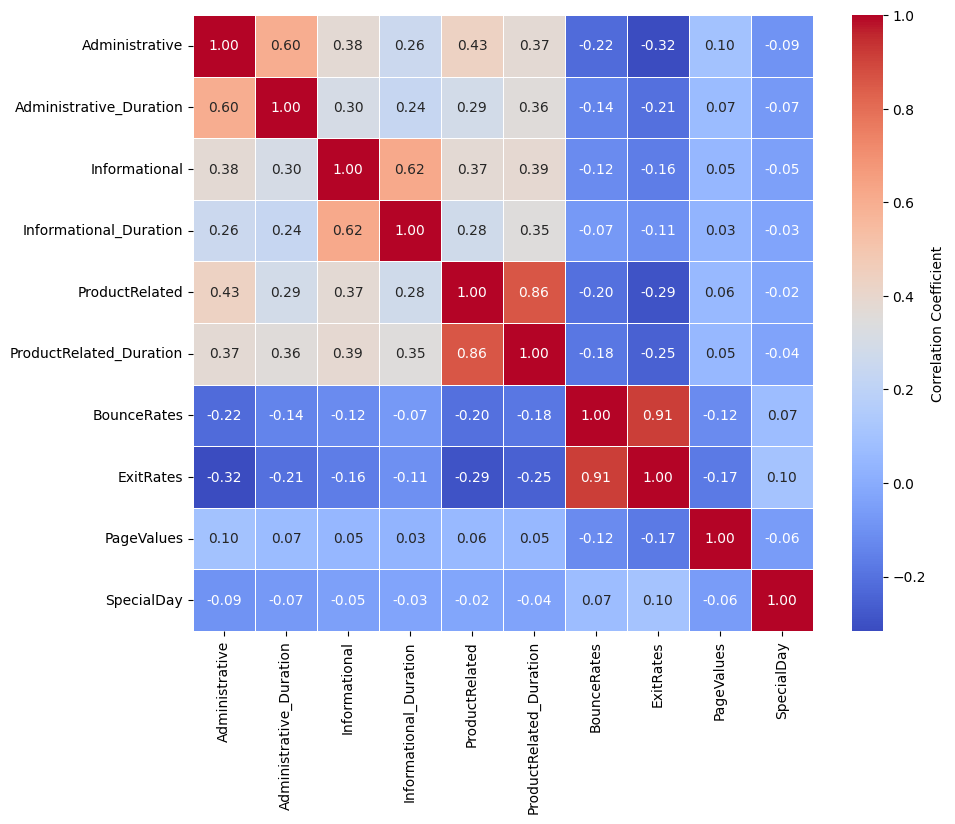

In [ ]:
corrs = df.drop(columns = ['Month', 'VisitorType', 'Browser', 'OperatingSystems', 'Region', 'TrafficType', 'Weekend', 'Revenue']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corrs, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={'label': 'Correlation Coefficient'})
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

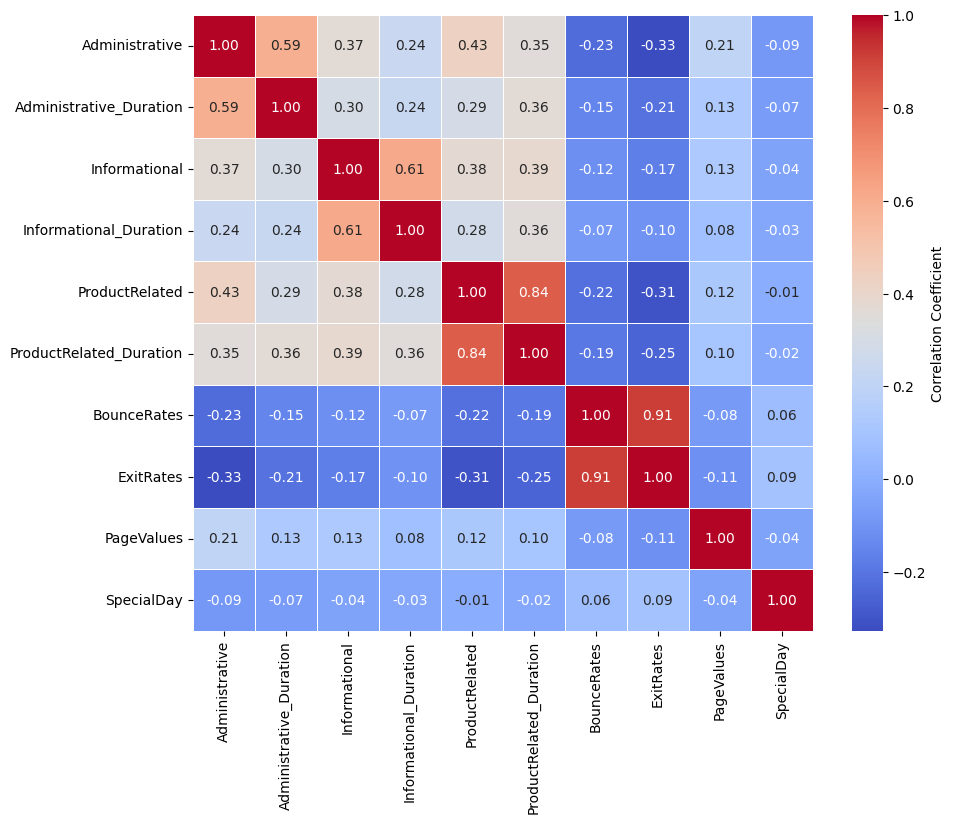

In [ ]:
df_false = df[df['Revenue'] == False]

corrs_false = df_false.drop(columns = ['Month', 'VisitorType', 'Browser', 'OperatingSystems', 'Region', 'TrafficType', 'Weekend', 'Revenue']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corrs_false, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={'label': 'Correlation Coefficient'})
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

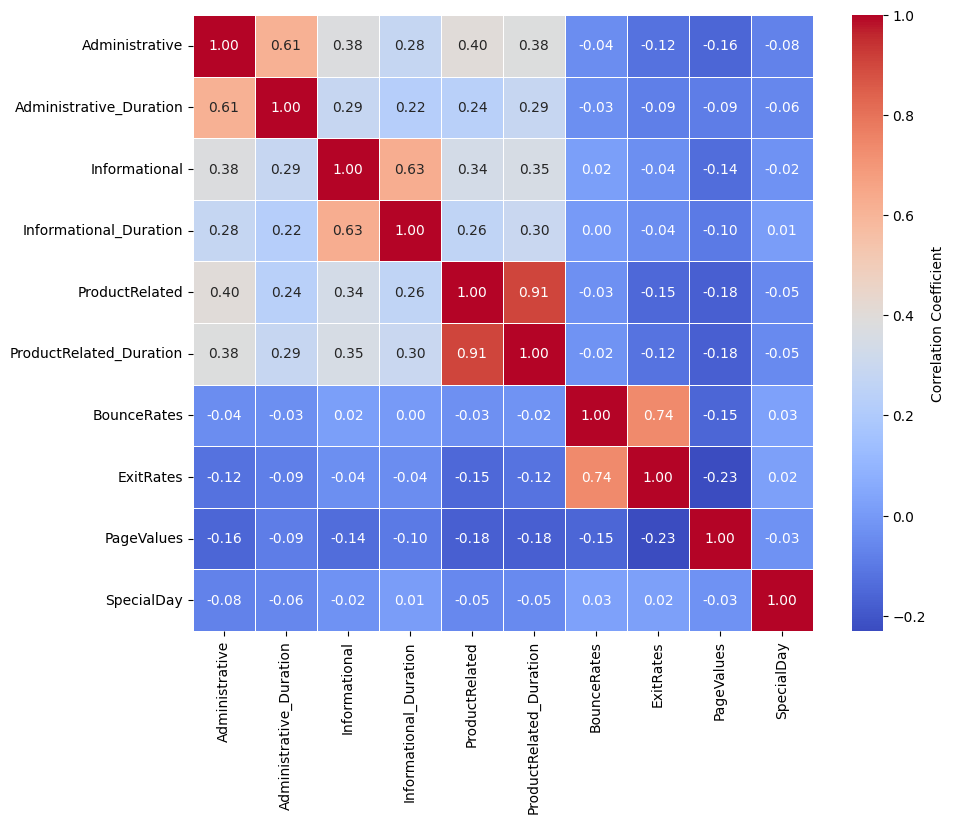

In [ ]:
df_true = df[df['Revenue'] == True]

corrs_true = df_true.drop(columns = ['Month', 'VisitorType', 'Browser', 'OperatingSystems', 'Region', 'TrafficType', 'Weekend', 'Revenue']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corrs_true, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={'label': 'Correlation Coefficient'})
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [ ]:
corr_var = df.drop(columns = ['Month', 'VisitorType', 'Browser', 'OperatingSystems', 'Region', 'TrafficType', 'Weekend']).corr()['Revenue']
corr_var

Administrative             0.138917
Administrative_Duration    0.093587
Informational              0.095200
Informational_Duration     0.070345
ProductRelated             0.158538
ProductRelated_Duration    0.152373
BounceRates               -0.150673
ExitRates                 -0.207071
PageValues                 0.492569
SpecialDay                -0.082305
Revenue                    1.000000
Name: Revenue, dtype: float64

<Axes: >

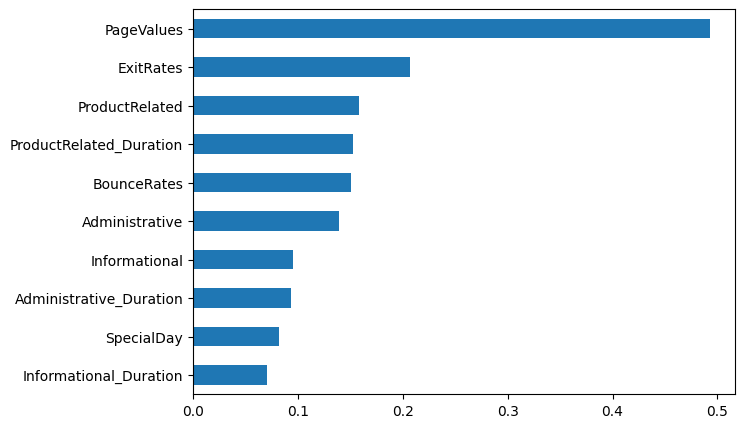

In [ ]:
abs(corr_var).sort_values().drop('Revenue').plot(kind = 'barh', figsize = (7, 5))

**Conclusões**:
- As variáveis BouceRates e ExitRates são altamente correlacionadas (correlação > 0.7) tanto olhando o dataset como um todo quanto olhado para as duas classes da variável target
- As variáveis ProductRelated e ProductRelated_Duration são altamente correlacionadas (correlação > 0.7) tanto olhando o dataset como um todo quanto olhado para as duas classes da variável target
- A variável PageValues possui a maior correlação (~ 0.5) com a variável target

Levando em conta essas conclusões, tivemos que pensar em como tratar essas variáveis para que isso não influenciasse em modelos sensíveis a multicolinearidade.

## Bloco 2: Como as variáveis estão distribuídas?

**Histogramas** ou **gráficos de densidade** para variáveis contínuas como `Administrative`, `Administrative_Duration`, `Informational`, `Informational_Duration`, `ProductRelated`, `ProductRelated_Duration`, `BounceRates`, `ExitRates`, `PageValues`:

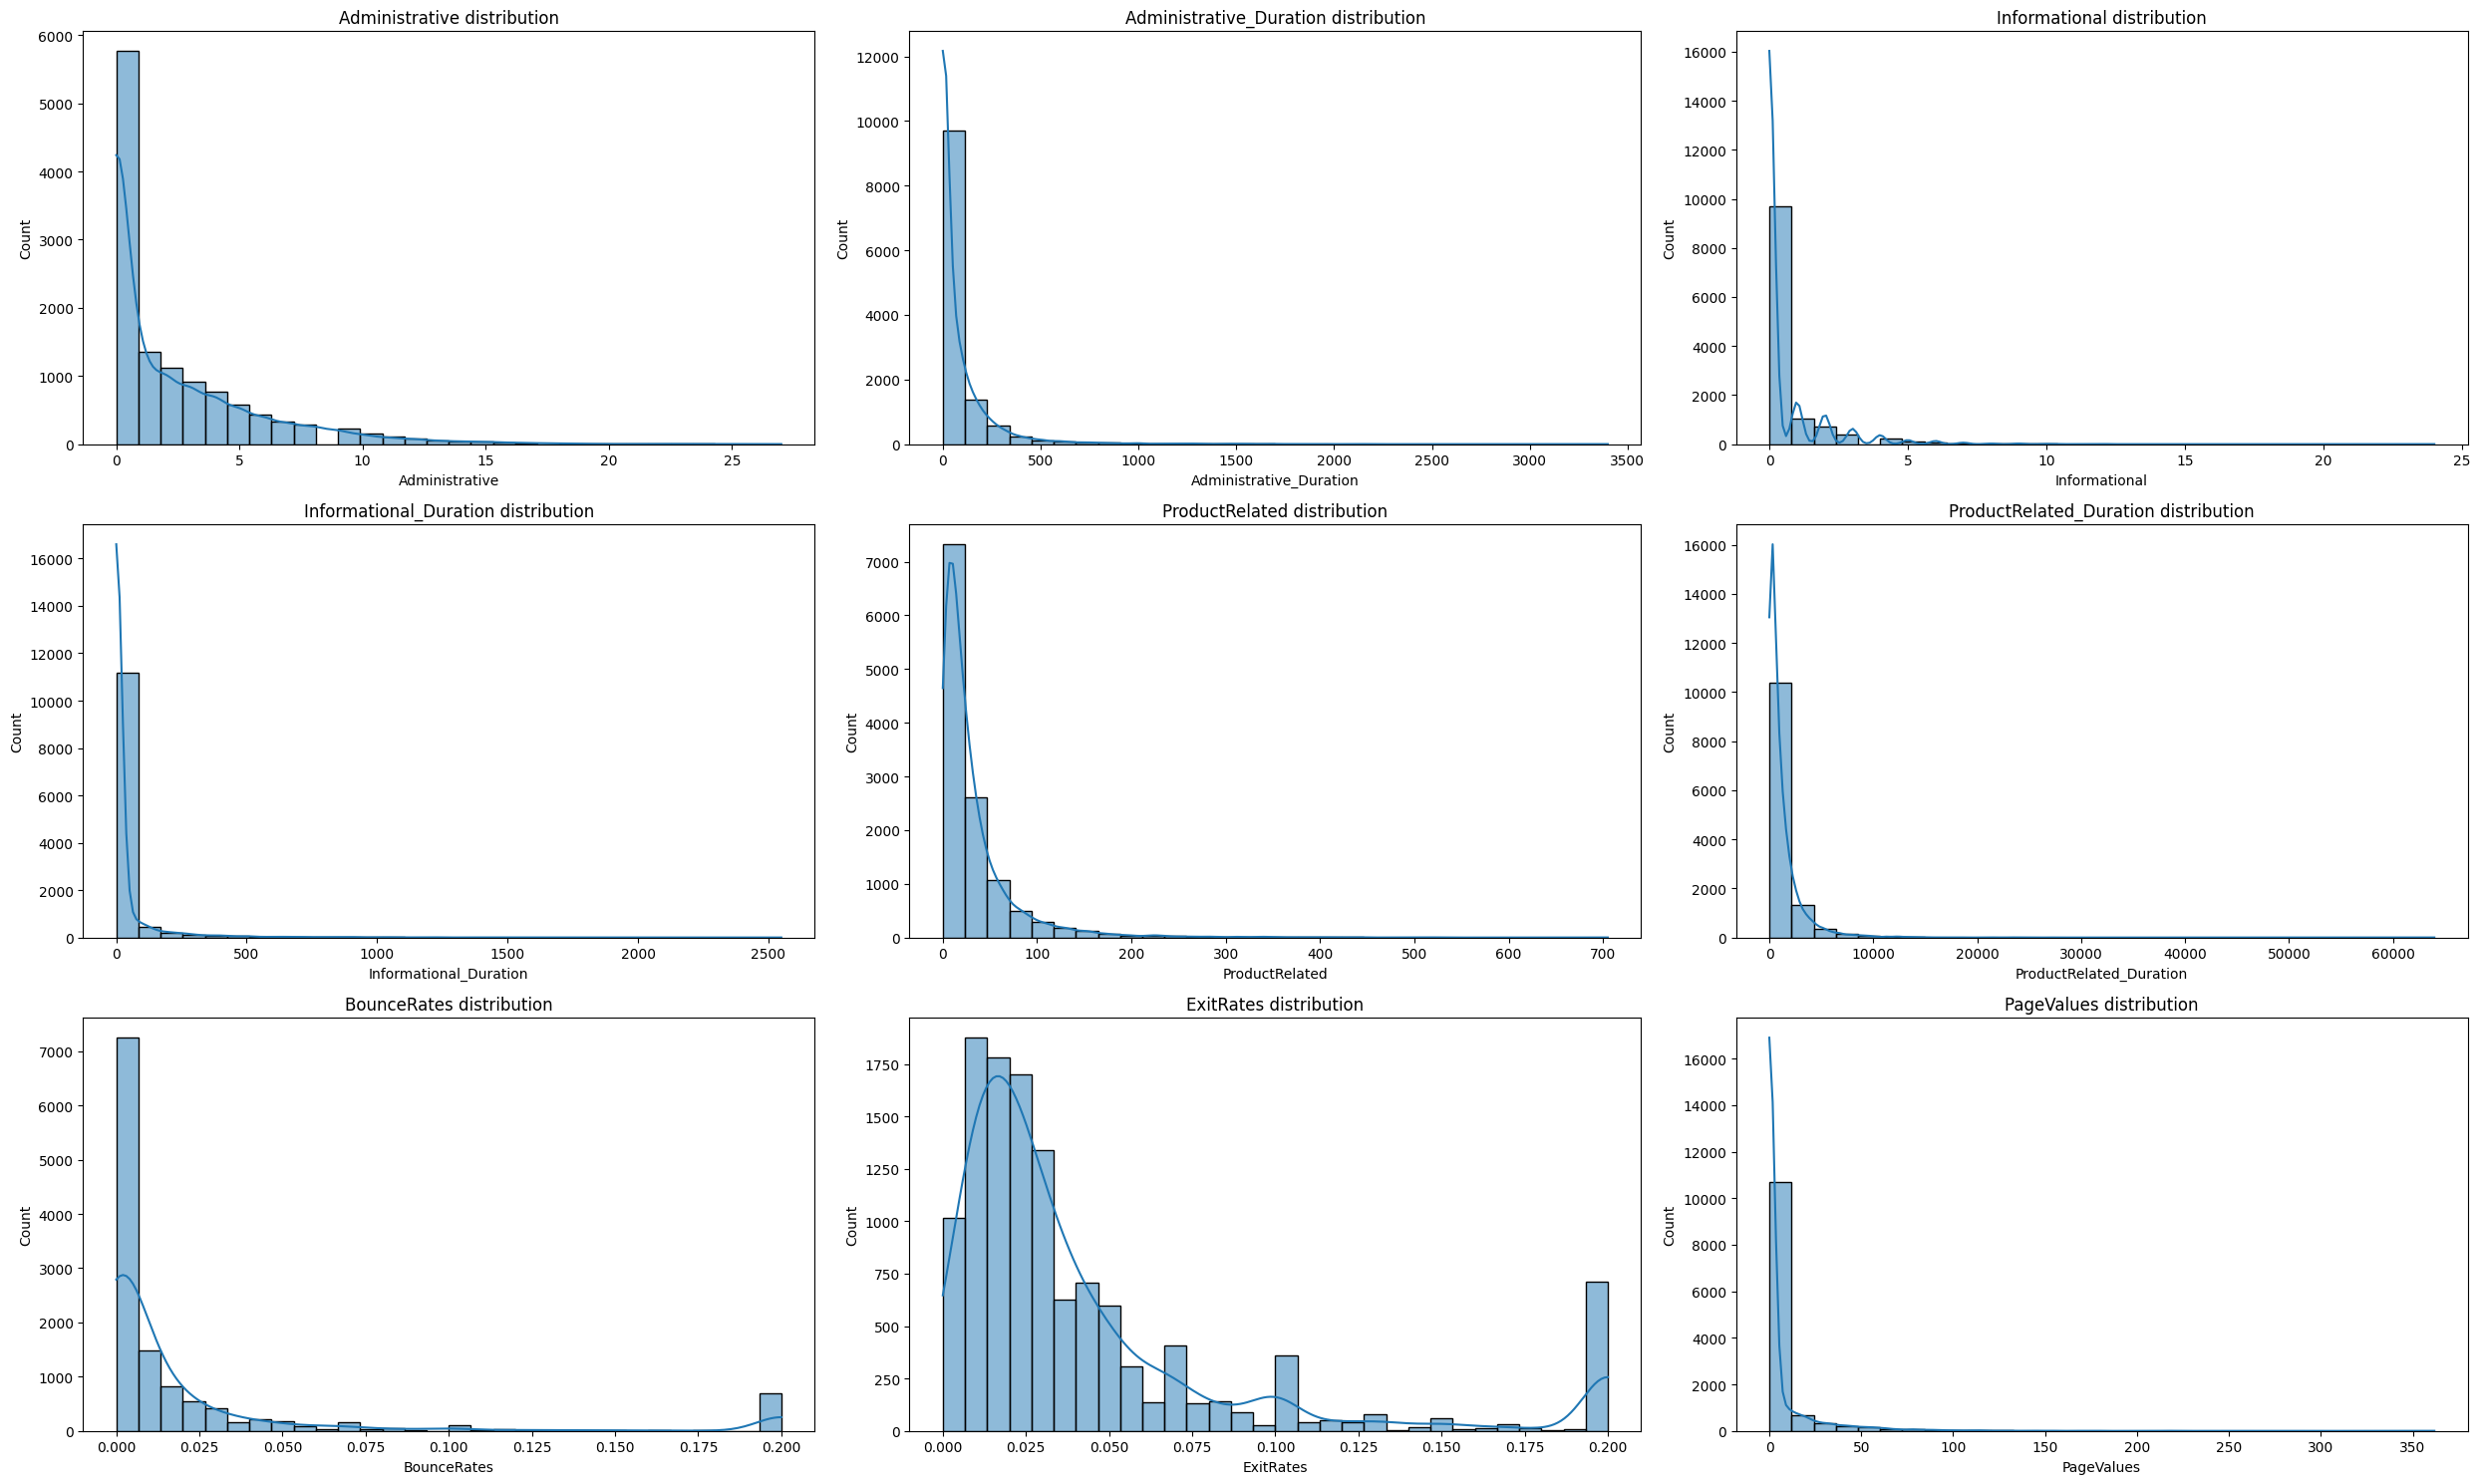

In [ ]:
cols = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25, 15))
axes = axes.flatten()

for i, coluna in enumerate(cols):
    sns.histplot(data = df, x = coluna, bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'{coluna} distribution')

plt.tight_layout()
plt.show()

**Conclusões**:
- Dentre os tipos de páginas, as relacionadas a produtos tiveram mais visitas e um maior tempo de duração. Já as páginas informacionais tiveram um menor número de visitas e um menor tempo de permanência.
- É possível reparar que existem alguns outliers na quantidade de visitas e no tempo de permanência nos três tipos de páginas
- As visitas parecem estar mais bem distribuídas dentro da variável de taxa de saída.
- É possivel identificar outliers nas variáveis de taxa de bounce e saída, principalmente nos valores próximos a 0.2

**Gráficos de barras** para variáveis categóricas como `SpecialDay`, `Month`, `OperatingSystems`, `Browser`, `Region`, `TrafficType`, `VisitorType`, `Weekend`:

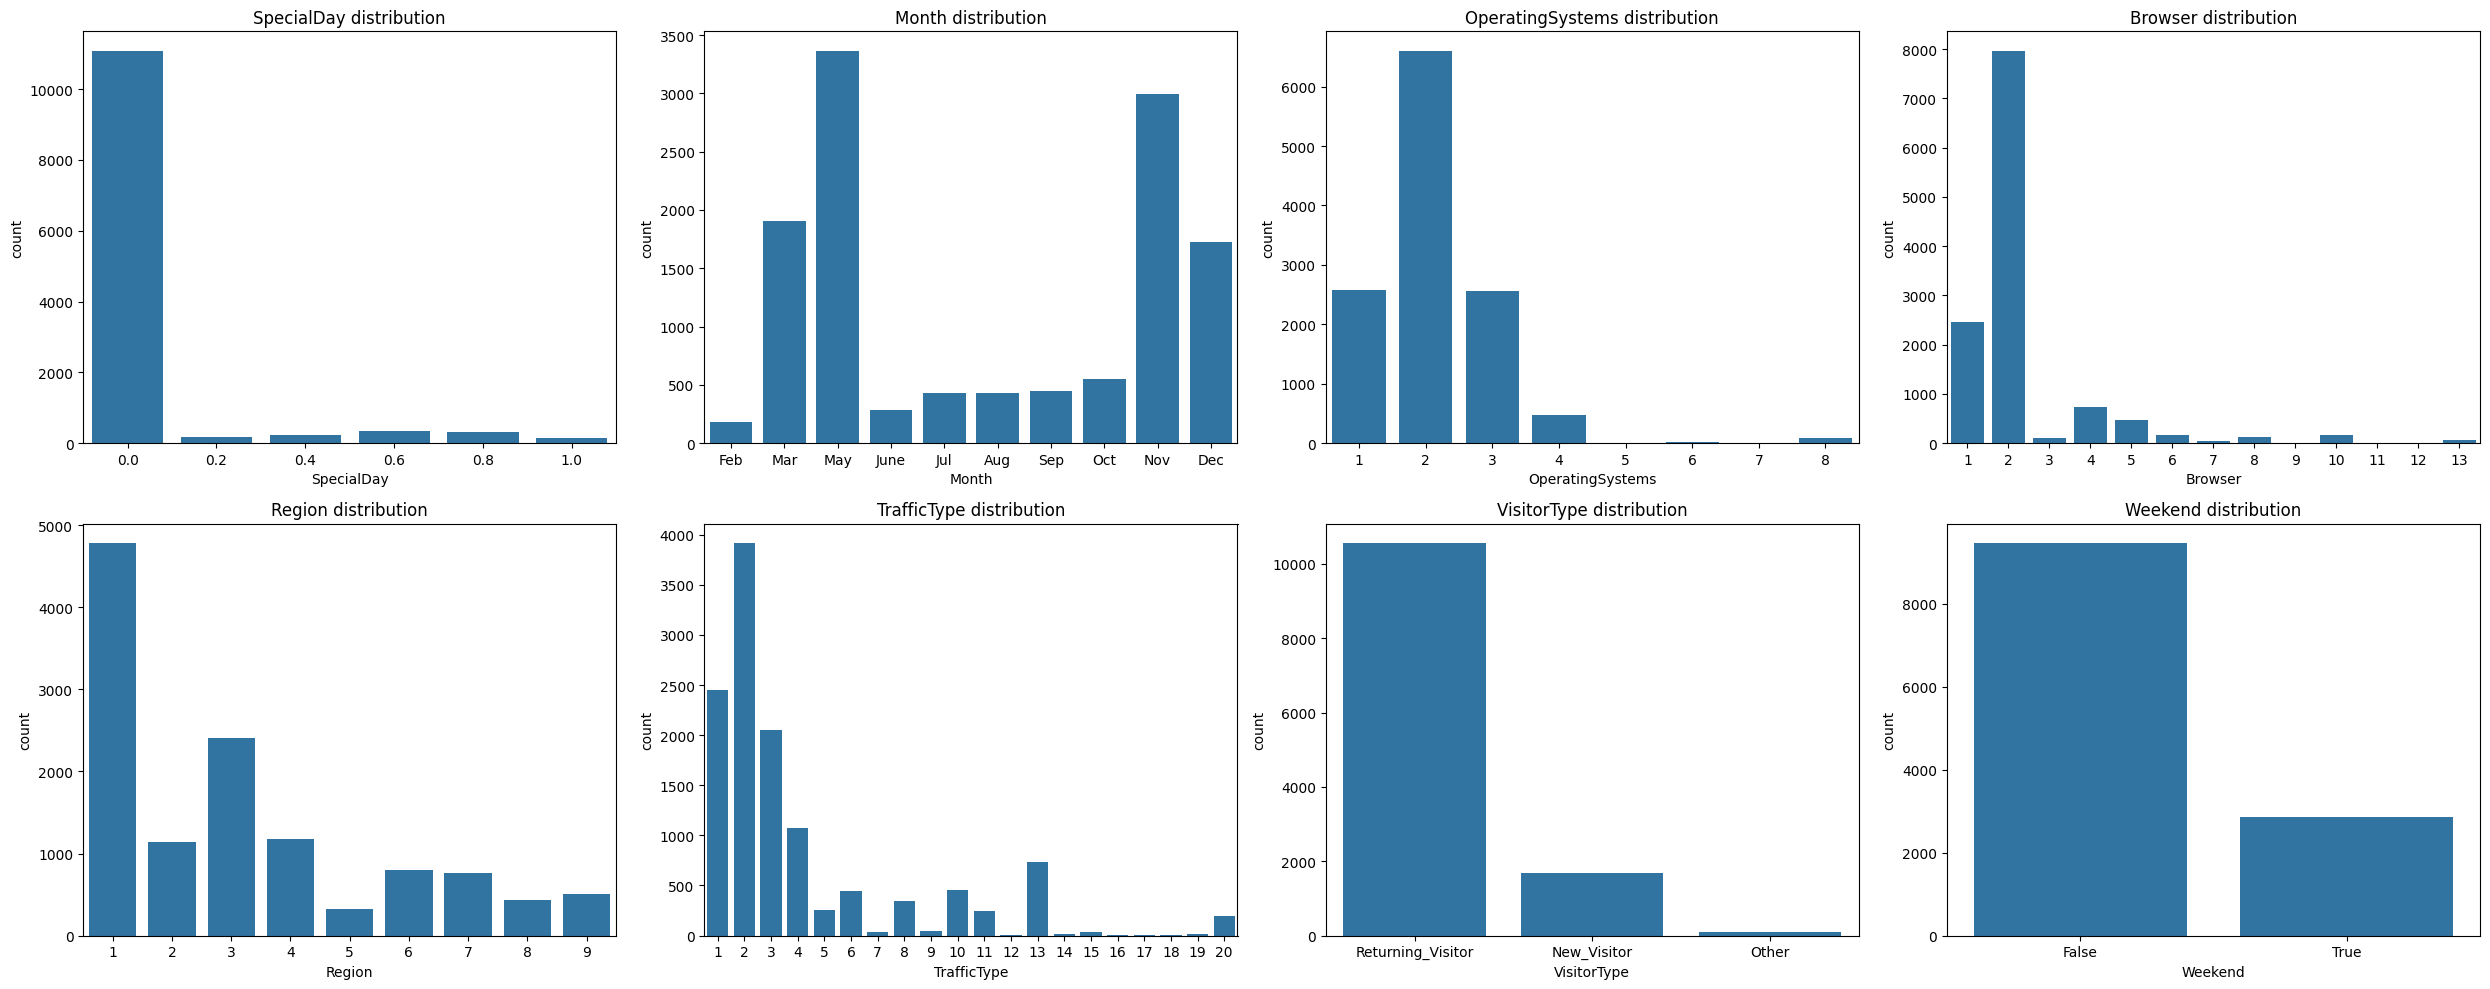

In [ ]:
cols = ['SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(25, 10))
axes = axes.flatten()

for i, coluna in enumerate(cols):
    sns.countplot(x = coluna, data = df, ax=axes[i])
    axes[i].set_title(f'{coluna} distribution')

plt.tight_layout()
plt.show()

In [ ]:
df[df['SpecialDay'] > 0]['Month'].unique()

['Feb', 'May']
Categories (10, object): ['Feb' < 'Mar' < 'May' < 'June' ... 'Sep' < 'Oct' < 'Nov' < 'Dec']

**Conclusões**:
- A maior parte das sessões **não** são próximas a datas especiais (um dia antes ou um dia depois).
    - As datas especiais que são levadas em conta nesse dataset aparentemente são apenas dia das mães e dia dos namorados que ocorrem nos meses de maio e fevereiro
- Os meses com mais atividades são Maio, Novembro, Dezembro e Março
    - Maio: Dia das mães?
    - Novembro: Black Friday?
    - Dezembro: Natal?
    - Março: não conseguimos pensar num motivo
- A maioria das sessões ocorreram no sistema operacional 2, no navegador 2, na região 1 e no tipo de tráfego 2. Como não tivemos acesso ao dicionário dos dados e não sabemos o que cada um das categorias representa, não temos como nos aprofundar na análise.
- A maior parte dos visitantes eram retornantes, ou seja, já tinham visitado o site anteriormente
- A maior atividade ocorre durante a semana

## Bloco 3: O que influencia no sucesso da compra?

### Existe influência de dias especiais?

In [ ]:
tabela = df.groupby('SpecialDay')['Revenue'].value_counts(normalize=True).unstack(fill_value=0)

tabela

Revenue,False,True
SpecialDay,,
0.0,0.834732,0.165268
0.2,0.921348,0.078652
0.4,0.946502,0.053498
0.6,0.917379,0.082621
0.8,0.966154,0.033846
1.0,0.935065,0.064935


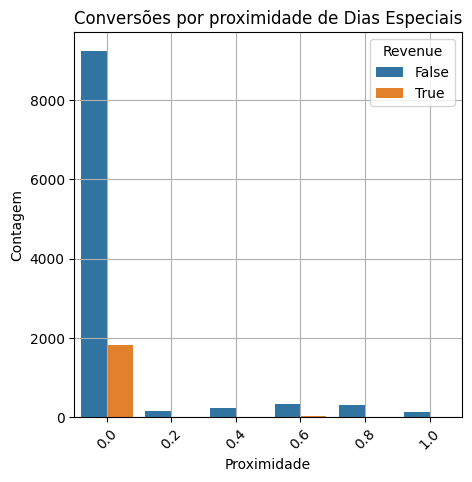

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(x='SpecialDay', data=df, hue='Revenue')
plt.title('Conversões por proximidade de Dias Especiais')
plt.xticks(rotation=45)
plt.xlabel('Proximidade')
plt.ylabel('Contagem')
plt.grid(True)
plt.show()

### Existe influência da época da visita?

In [ ]:
meses_ordenados = ['Feb', 'Mar', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

df['Month'] = pd.Categorical(df['Month'], categories=meses_ordenados, ordered=True)

tabela = df.groupby('Month')['Revenue'].value_counts(normalize=True).unstack(fill_value=0)

tabela

Revenue,False,True
Month,,
Feb,0.983696,0.016304
Mar,0.899318,0.100682
May,0.891498,0.108502
June,0.899306,0.100694
Jul,0.847222,0.152778
Aug,0.824480,0.175520
Sep,0.808036,0.191964
Oct,0.790528,0.209472
Nov,0.746498,0.253502


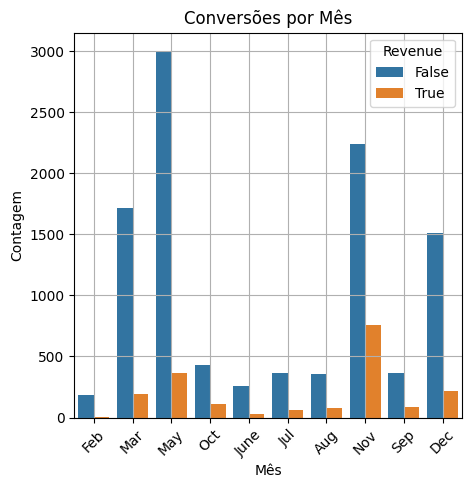

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(x='Month', data=df, hue='Revenue')
plt.title('Conversões por Mês')
plt.xticks(rotation=45)
plt.xlabel('Mês')
plt.ylabel('Contagem')
plt.grid(True)
plt.show()

### Existe influência do Navegador utilizado?

In [ ]:
tabela = df.groupby('Browser')['Revenue'].value_counts(normalize=True).unstack(fill_value=0)

tabela

Revenue,False,True
Browser,,
1,0.851747,0.148253
2,0.846376,0.153624
3,0.952381,0.047619
4,0.823370,0.176630
5,0.815846,0.184154
6,0.885057,0.114943
7,0.877551,0.122449
8,0.844444,0.155556
9,1.000000,0.000000


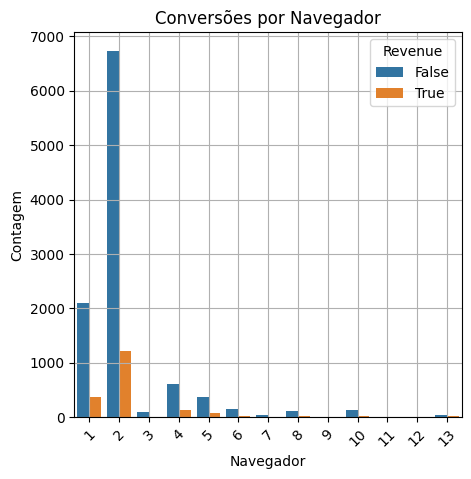

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(x='Browser', data=df, hue='Revenue')
plt.title('Conversões por Navegador')
plt.xticks(rotation=45)
plt.xlabel('Navegador')
plt.ylabel('Contagem')
plt.grid(True)
plt.show()

### Existe influência da forma como o cliente chegou no site?

In [ ]:
tabela = df.groupby('TrafficType')['Revenue'].value_counts(normalize=True).unstack(fill_value=0)

tabela

Revenue,False,True
TrafficType,,
1,0.893105,0.106895
2,0.783542,0.216458
3,0.912281,0.087719
4,0.845650,0.154350
5,0.784615,0.215385
6,0.880631,0.119369
7,0.700000,0.300000
8,0.723032,0.276968
9,0.904762,0.095238


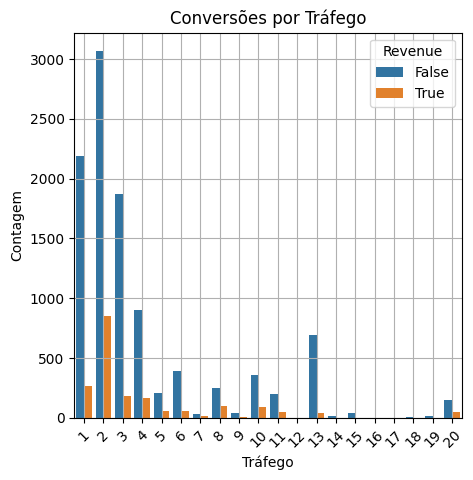

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(x='TrafficType', data=df, hue='Revenue')
plt.title('Conversões por Tráfego')
plt.xticks(rotation=45)
plt.xlabel('Tráfego')
plt.ylabel('Contagem')
plt.grid(True)
plt.show()

### Existe influência se o visitante é novo ou retornante?

In [ ]:
tabela = df.groupby('VisitorType')['Revenue'].value_counts(normalize=True).unstack(fill_value=0)

tabela

Revenue,False,True
VisitorType,,
New_Visitor,0.750885,0.249115
Other,0.811765,0.188235
Returning_Visitor,0.860677,0.139323


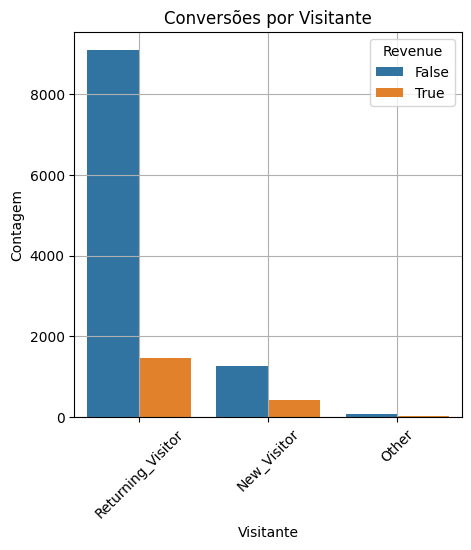

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(x='VisitorType', data=df, hue='Revenue')
plt.title('Conversões por Visitante')
plt.xticks(rotation=45)
plt.xlabel('Visitante')
plt.ylabel('Contagem')
plt.grid(True)
plt.show()

### Existe influência de visitas em finais de semana?

In [ ]:
tabela = df.groupby('Weekend')['Revenue'].value_counts(normalize=True).unstack(fill_value=0)

tabela

Revenue,False,True
Weekend,,
False,0.851089,0.148911
True,0.826011,0.173989


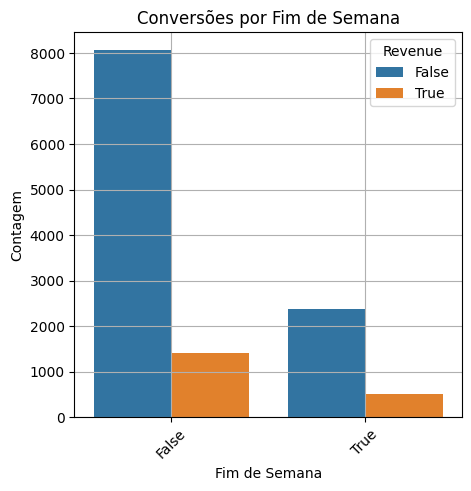

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(x='Weekend', data=df, hue='Revenue')
plt.title('Conversões por Fim de Semana')
plt.xticks(rotation=45)
plt.xlabel('Fim de Semana')
plt.ylabel('Contagem')
plt.grid(True)
plt.show()

### Existe influência da região em que o visitante se encontra?

In [ ]:
tabela = df.groupby('Region')['Revenue'].value_counts(normalize=True).unstack(fill_value=0)

tabela

Revenue,False,True
Region,,
1,0.838703,0.161297
2,0.834507,0.165493
3,0.854765,0.145235
4,0.851946,0.148054
5,0.836478,0.163522
6,0.860870,0.139130
7,0.843627,0.156373
8,0.870968,0.129032
9,0.831703,0.168297


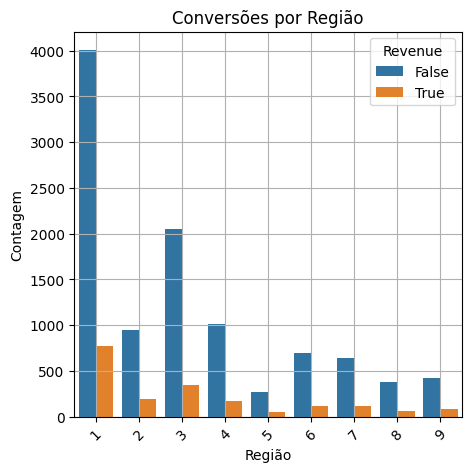

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(x='Region', data=df, hue='Revenue')
plt.title('Conversões por Região')
plt.xticks(rotation=45)
plt.xlabel('Região')
plt.ylabel('Contagem')
plt.grid(True)
plt.show()

### Existe influência do sistema operacional utilizado?

In [ ]:
tabela = df.groupby('OperatingSystems')['Revenue'].value_counts(normalize=True).unstack(fill_value=0)

tabela

Revenue,False,True
OperatingSystems,,
1,0.853385,0.146615
2,0.825027,0.174973
3,0.895108,0.104892
4,0.822176,0.177824
5,0.833333,0.166667
6,0.894737,0.105263
7,0.857143,0.142857
8,0.784810,0.215190


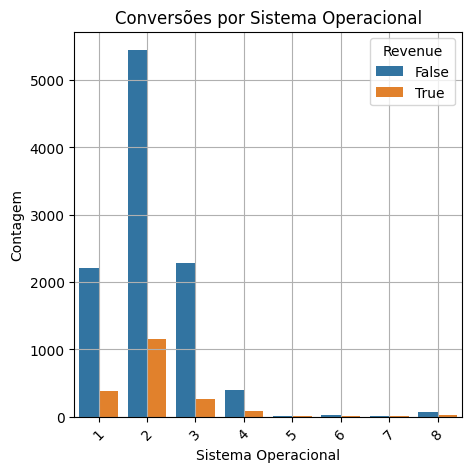

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(x='OperatingSystems', data=df, hue='Revenue')
plt.title('Conversões por Sistema Operacional')
plt.xticks(rotation=45)
plt.xlabel('Sistema Operacional')
plt.ylabel('Contagem')
plt.grid(True)
plt.show()

### A quantidade de páginas administrativas e o tempo de permanência nessas páginas influencia?

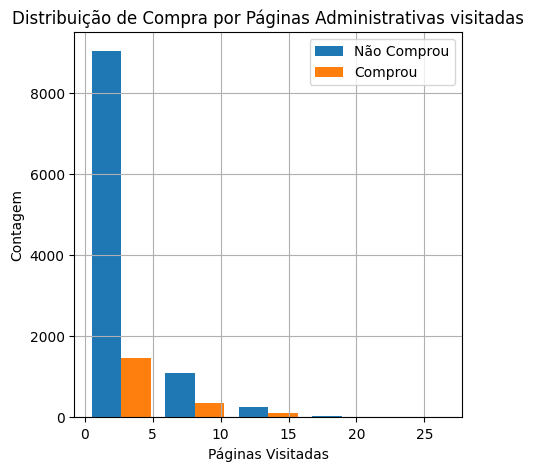

In [ ]:
intervalos = int(df['Administrative'].max()//5)
plt.figure(figsize=(5, 5))
plt.hist([df[df['Revenue'] == 0]['Administrative'], df[df['Revenue'] == 1]['Administrative']], bins=intervalos, label=['Não Comprou', 'Comprou'])
plt.xlabel('Páginas Visitadas')
plt.ylabel('Contagem')
plt.title('Distribuição de Compra por Páginas Administrativas visitadas')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
x = df[df['Revenue'] == 0]['Administrative']
y = df[df['Revenue'] == 1]['Administrative']

In [ ]:
mannwhitneyu(x, y)

MannwhitneyuResult(statistic=7421135.5, pvalue=1.3119317092531027e-77)

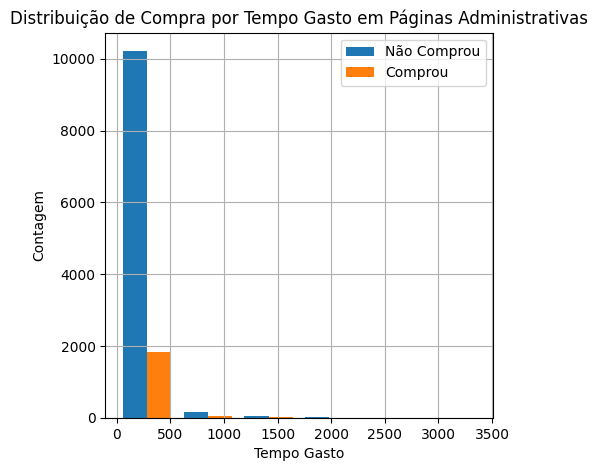

In [ ]:
intervalos = int(df['Administrative_Duration'].max()//500)
plt.figure(figsize=(5, 5))
plt.hist([df[df['Revenue'] == 0]['Administrative_Duration'], df[df['Revenue'] == 1]['Administrative_Duration']], bins=intervalos, label=['Não Comprou', 'Comprou'])
plt.xlabel('Tempo Gasto')
plt.ylabel('Contagem')
plt.title('Distribuição de Compra por Tempo Gasto em Páginas Administrativas')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
x = df[df['Revenue'] == 0]['Administrative_Duration']
y = df[df['Revenue'] == 1]['Administrative_Duration']

In [ ]:
mannwhitneyu(x, y)

MannwhitneyuResult(statistic=7487115.0, pvalue=4.672260904769867e-74)

### A quantidade de páginas infomacionais e o tempo de permanência nessas páginas influencia?

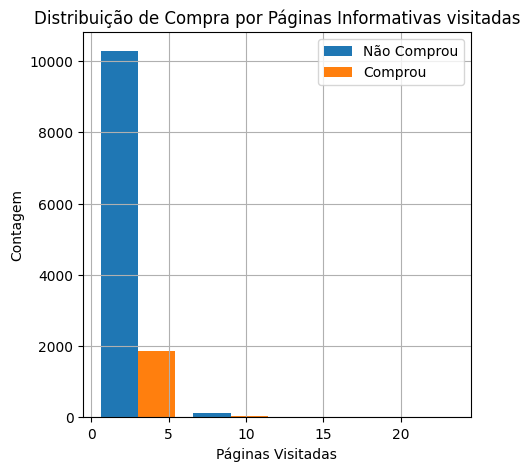

In [ ]:
intervalos = int(df['Informational'].max()//5)
plt.figure(figsize=(5, 5))
plt.hist([df[df['Revenue'] == 0]['Informational'], df[df['Revenue'] == 1]['Informational']], bins=intervalos, label=['Não Comprou', 'Comprou'])
plt.xlabel('Páginas Visitadas')
plt.ylabel('Contagem')
plt.title('Distribuição de Compra por Páginas Informativas visitadas')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
x = df[df['Revenue'] == 0]['Informational']
y = df[df['Revenue'] == 1]['Informational']

In [ ]:
mannwhitneyu(x, y)

MannwhitneyuResult(statistic=8648742.0, pvalue=1.2027813960741891e-36)

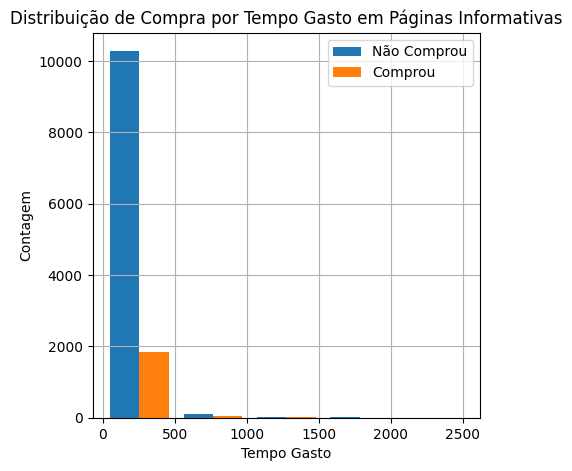

In [ ]:
intervalos = int(df['Informational_Duration'].max()//500)
plt.figure(figsize=(5, 5))
plt.hist([df[df['Revenue'] == 0]['Informational_Duration'], df[df['Revenue'] == 1]['Informational_Duration']], bins=intervalos, label=['Não Comprou', 'Comprou'])
plt.xlabel('Tempo Gasto')
plt.ylabel('Contagem')
plt.title('Distribuição de Compra por Tempo Gasto em Páginas Informativas')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
x = df[df['Revenue'] == 0]['Informational_Duration']
y = df[df['Revenue'] == 1]['Informational_Duration']

In [ ]:
mannwhitneyu(x, y)

MannwhitneyuResult(statistic=8711649.0, pvalue=1.4090385051061033e-35)

### A quantidade de páginas relacionadas a produtos e o tempo de permanência nessas páginas influencia?

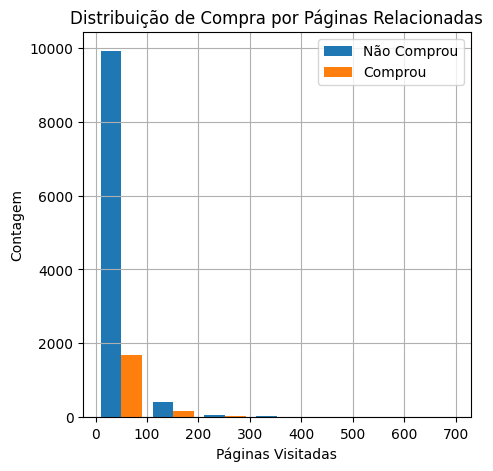

In [ ]:
intervalos = int(df['ProductRelated'].max()//100)
plt.figure(figsize=(5, 5))
plt.hist([df[df['Revenue'] == 0]['ProductRelated'], df[df['Revenue'] == 1]['ProductRelated']], bins=intervalos, label=['Não Comprou', 'Comprou'])
plt.xlabel('Páginas Visitadas')
plt.ylabel('Contagem')
plt.title('Distribuição de Compra por Páginas Relacionadas')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
x = df[df['Revenue'] == 0]['ProductRelated']
y = df[df['Revenue'] == 1]['ProductRelated']

In [ ]:
mannwhitneyu(x, y)

MannwhitneyuResult(statistic=6792127.0, pvalue=1.0524385772690994e-107)

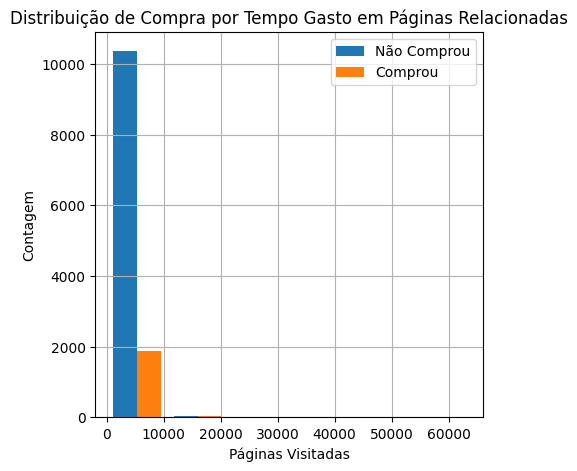

In [ ]:
intervalos = int(df['ProductRelated_Duration'].max()//10000)
plt.figure(figsize=(5, 5))
plt.hist([df[df['Revenue'] == 0]['ProductRelated_Duration'], df[df['Revenue'] == 1]['ProductRelated_Duration']], bins=intervalos, label=['Não Comprou', 'Comprou'])
plt.xlabel('Páginas Visitadas')
plt.ylabel('Contagem')
plt.title('Distribuição de Compra por Tempo Gasto em Páginas Relacionadas')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
x = df[df['Revenue'] == 0]['ProductRelated_Duration']
y = df[df['Revenue'] == 1]['ProductRelated_Duration']

In [ ]:
mannwhitneyu(x, y)

MannwhitneyuResult(statistic=6502463.0, pvalue=5.332268364164621e-128)

### Aa taxas de entrada e saída têm influencia?

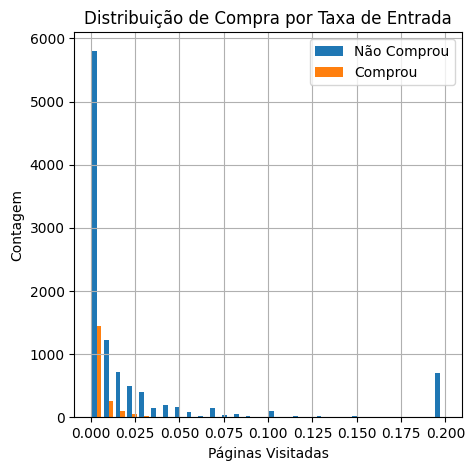

In [ ]:
plt.figure(figsize=(5, 5))
plt.hist([df[df['Revenue'] == 0]['BounceRates'], df[df['Revenue'] == 1]['BounceRates']], bins=30, label=['Não Comprou', 'Comprou'])
plt.xlabel('Páginas Visitadas')
plt.ylabel('Contagem')
plt.title('Distribuição de Compra por Taxa de Entrada')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
x = df[df['Revenue'] == 0]['BounceRates']
y = df[df['Revenue'] == 1]['BounceRates']

In [ ]:
mannwhitneyu(x, y)

MannwhitneyuResult(statistic=12198493.0, pvalue=1.832770059117907e-61)

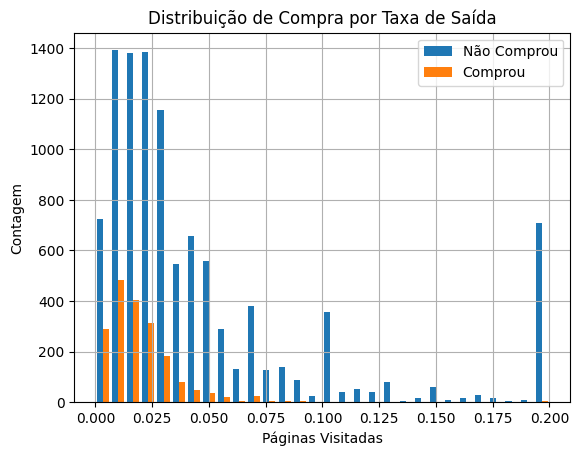

In [ ]:
plt.hist([df[df['Revenue'] == 0]['ExitRates'], df[df['Revenue'] == 1]['ExitRates']], bins=30, label=['Não Comprou', 'Comprou'])
plt.xlabel('Páginas Visitadas')
plt.ylabel('Contagem')
plt.title('Distribuição de Compra por Taxa de Saída')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
x = df[df['Revenue'] == 0]['ExitRates']
y = df[df['Revenue'] == 1]['ExitRates']

In [ ]:
mannwhitneyu(x, y)

MannwhitneyuResult(statistic=13981307.0, pvalue=1.1568241971827584e-175)

# 2 - Análise de Segmentação dos dados

Decidimos fazer uma análise de clusterização dos dados para encontrar grupos de comportamentos de acessos.

Como essa clusterização basicamente separou os grupos entre acessos com e sem transações, fizemos uma análise mais aprofundada desses grupos.

Para isso foram retiradas as variáveis categóricas, pois não temos o dicionário dos dados para nos aprofundar na análise.

In [ ]:
def calc_inercias(X, lista_k, plot=True):
    lista_inercias = []

    X_df = pd.DataFrame(X, columns = [f"X{i+1}" for i in range(X.shape[1])])

    for k in lista_k:
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(X)

        labels_clusters = kmeans.labels_

        # Cálculo das inércias
        inercia = kmeans.inertia_
        lista_inercias.append(inercia)

        labels_series = pd.Series(labels_clusters, name = 'label')
        df_result = pd.concat([X_df, labels_series], axis = 1)

        # Vamos, também, plotar como ficam os agrupamentos
        if plot and X.shape[1] == 2:
            print(f"\nInércia para clusterização com k = {k}: {inercia}")

            sns.jointplot(data = df_result,
                        x = 'X1',
                        y = 'X2',
                        hue = 'label')
            plt.show()
    return lista_inercias

In [ ]:
# função para plotar as inércias
def plot_cotovelo(lista_k, lista_inercias):
    plt.figure(figsize=(8,5))

    plt.title('Método do cotovelo')
    plt.plot(lista_k, lista_inercias, marker = "o")

    plt.xlabel("k")
    plt.ylabel("Inércia (WCSS)")

    plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

def calc_silhueta(X, lista_k, plot = True):
    lista_silhuetas = []

    X_df = pd.DataFrame(X, columns = [f"X{i+1}" for i in range(X.shape[1])])

    for k in lista_k:
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(X)

        labels_clusters = kmeans.labels_

        # Cálculo das silhuetas
        silhueta = silhouette_score(X, labels_clusters)
        lista_silhuetas.append(silhueta)

        labels_series = pd.Series(labels_clusters, name = 'label')
        df_result = pd.concat([X_df, labels_series], axis = 1)

        # Vamos, também, plotar como ficam os agrupamentos
        if plot and X.shape[1] == 2:
            print(f"\nSilueta média para clusterização com k = {k}: {silhueta}")

            sns.jointplot(data = df_result,
                        x = 'X1',
                        y = 'X2',
                        hue = 'label')
            plt.show()
    return lista_silhuetas

In [ ]:
def plot_silhueta(X, lista_k):

    lista_silhuetas = calc_silhueta(X, lista_k, plot=False)

    plt.figure(figsize=(8, 5))

    plt.title("Método da silhueta")

    plt.plot(lista_k, lista_silhuetas, marker="o")

    plt.xlabel("k (# de clusters)")
    plt.ylabel("Mean silhouette score")

    plt.show()

Escalonamento dos dados

In [ ]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df.drop(columns = ['Month', 'VisitorType', 'Browser', 'OperatingSystems', 'Region', 'TrafficType', 'Weekend']))
df_transformed = pd.DataFrame(df_scaled, columns = df.drop(columns = ['Month', 'VisitorType', 'Browser', 'OperatingSystems', 'Region', 'TrafficType', 'Weekend']).columns)

## Clusterização do Dataset como um todo

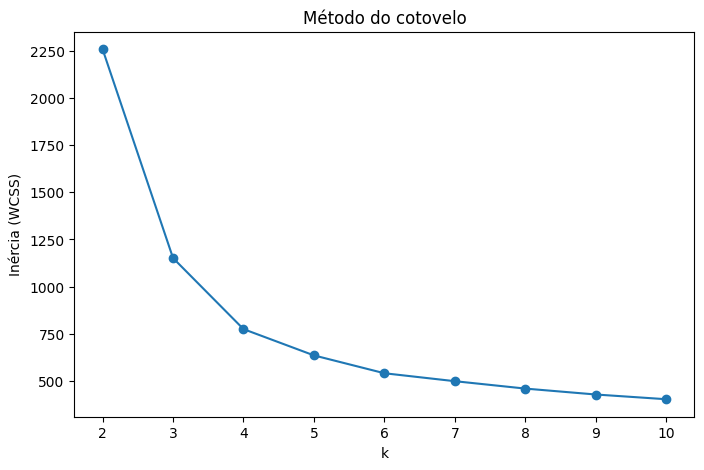

In [ ]:
inercias = calc_inercias(df_transformed, range(2, 11))
plot_cotovelo(range(2, 11), inercias)

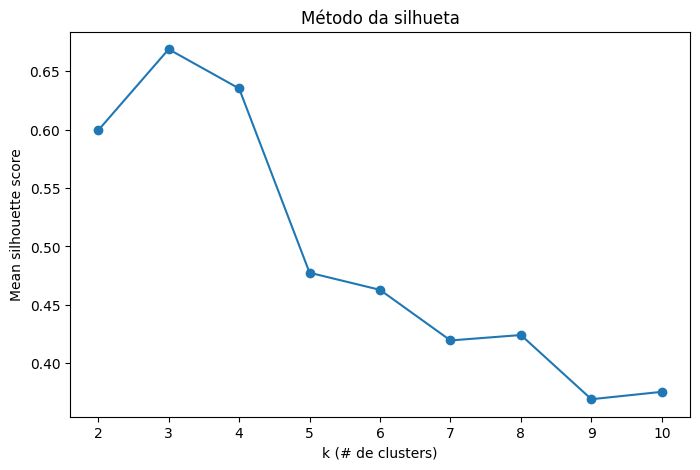

In [ ]:
lista_silhuetas = calc_silhueta(df_transformed, range(2, 11))
plot_silhueta(df_transformed, list(range(2, 11)))

In [ ]:
estimador = KMeans(n_clusters = 3, random_state=42)
modelo = estimador.fit(df_transformed)

In [ ]:
df_transformed['class'] = modelo.labels_

In [ ]:
df_transformed['class'].value_counts()

class
0    9494
1    1905
2     931
Name: count, dtype: int64

In [ ]:
df_merged_geral = df.merge(df_transformed['class'], how='left', left_index=True, right_index=True)

df_merged_geral.drop(columns=['Month', 'VisitorType', 'Browser', 'OperatingSystems', 'Region', 'TrafficType', 'Weekend']).groupby('class').mean()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Revenue
class,,,,,,,,,,,
0,2.321045,80.825539,0.494944,33.188105,31.255319,1169.762202,0.010294,0.033741,2.169144,0.065473,0.000000
1,3.398425,119.671406,0.787402,57.702153,48.283465,1879.164276,0.004810,0.019271,27.307454,0.023202,1.000000
2,0.038668,1.247870,0.010741,0.036735,2.718582,49.076903,0.179077,0.186938,0.000000,0.098389,0.003222


In [ ]:
df_merged_geral.groupby('class')['VisitorType'].value_counts(normalize=True).unstack()

VisitorType,New_Visitor,Other,Returning_Visitor
class,,,
0,0.130925,0.005582,0.863493
1,0.221522,0.008399,0.770079
2,0.031149,0.017186,0.951665


Após a análise das métricas de cada cluster, podemos concluir que o modelo separou as sessões em três grupos:

- **Classe 0:** um grupo que agrupa apenas sessões que não finalizaram em transações, mas cujo comportamento robusto ao longo da sessão (páginas visitadas, tempo gasto por categoria e page values significativos);
- **Classe 1:** um grupo que agrupa apenas sessões que finalizaram em transações;
- **Classe 2:** Um grupo que agrupa majoritariamente sessões que não finalizaram em transações, mas com o comportamento pouco relevante ao longo da sessão (páginas visitadas, tempo gasto por categoria e page values baixos).

Em geral, as três classes não possuem grande distinção em relação à distribuição dos tipos de visitante.

## Separação entre sessões com e sem transação

In [ ]:
df_transformed_true = df_transformed[df_transformed['Revenue'] == 1]
df_transformed_false = df_transformed[df_transformed['Revenue'] == 0]

### Clusterização da sessão com transação

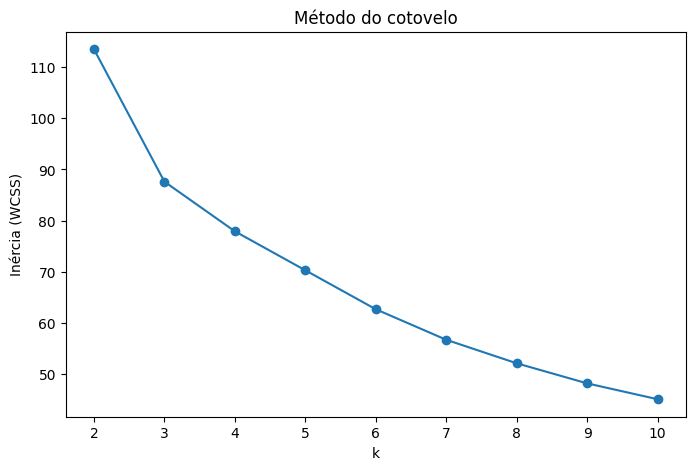

In [ ]:
inercias_true = calc_inercias(df_transformed_true, range(2, 11))
plot_cotovelo(range(2, 11), inercias_true)

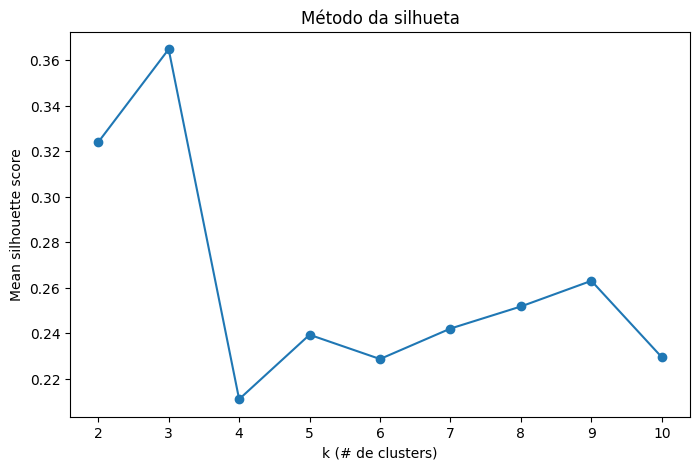

In [ ]:
lista_silhuetas_true = calc_silhueta(df_transformed_true, range(2, 11))
plot_silhueta(df_transformed_true, list(range(2, 11)))

In [ ]:
estimador_true = KMeans(n_clusters = 3, random_state=42)
modelo_true = estimador_true.fit(df_transformed_true)

In [ ]:
df_transformed_true['class'] = modelo_true.labels_

In [ ]:
df_transformed_true['class'].value_counts()

class
1    1371
0     474
2      63
Name: count, dtype: int64

In [ ]:
df_merged_true = df[df['Revenue'] == True].merge(df_transformed_true['class'], how='left', left_index=True, right_index=True)

df_merged_true.drop(columns=['Month', 'VisitorType', 'Browser', 'OperatingSystems', 'Region', 'TrafficType', 'Weekend']).groupby('class').mean()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Revenue
class,,,,,,,,,,,
0,8.607595,306.381078,1.845992,149.396267,93.312236,3598.374798,0.004511,0.016460,17.083174,0.002110,1.0
1,1.663749,57.686772,0.428884,25.511139,33.354486,1309.139767,0.005221,0.020509,31.011096,0.001313,1.0
2,1.809524,58.108466,0.587302,65.603175,32.158730,1259.486824,0.007427,0.022077,22.334339,0.657143,1.0


In [ ]:
df_merged_true.groupby('class')['VisitorType'].value_counts(normalize=True).unstack()

VisitorType,New_Visitor,Other,Returning_Visitor
class,,,
0,0.097046,0.002110,0.900844
1,0.266229,0.010941,0.722830
2,0.174603,NaN,0.825397


A análise mais aprofundada do conjunto de sessões que finalizou em transação permite um melhor entendimento do comportamento desse grupo.

- **Classe 0:** Sessões que visitaram mais páginas, assim como gastaram mais tempo nelas.
- **Classe 1:** Sessões que visitaram menos páginas e gastaram um menor tempo em relação à classe 0, mas possuem os maiores PageValues.
- **Classe 2:** Sessões que visitaram menos páginas e gastaram um menor tempo em relação à classe anterior, mas as maiores proximidades em relação às datas comemorativas.

Para essa clusterização, fica mais perceptível a diferença entre as classe em termos de tipo de visitante. A classe 1 agrega uma maior quantidade relativa de novos visitantes em relação às outras classes. Isso pode ser atribuído ao alto valor médio de PageValues dessa classe.

<Axes: xlabel='PageValues', ylabel='ProductRelated'>

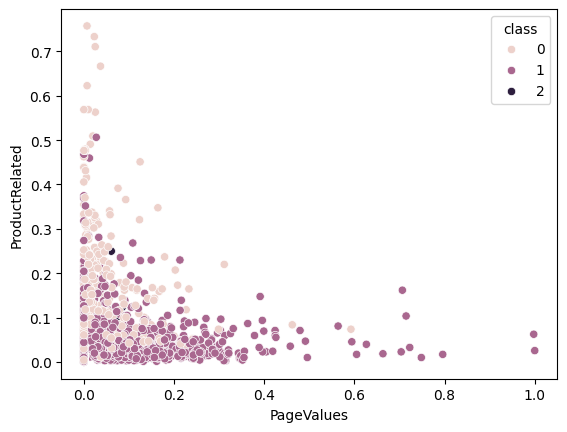

In [ ]:
sns.scatterplot(data = df_transformed_true, y='ProductRelated', x = 'PageValues', hue='class')

### Clusterização da sessão sem transação

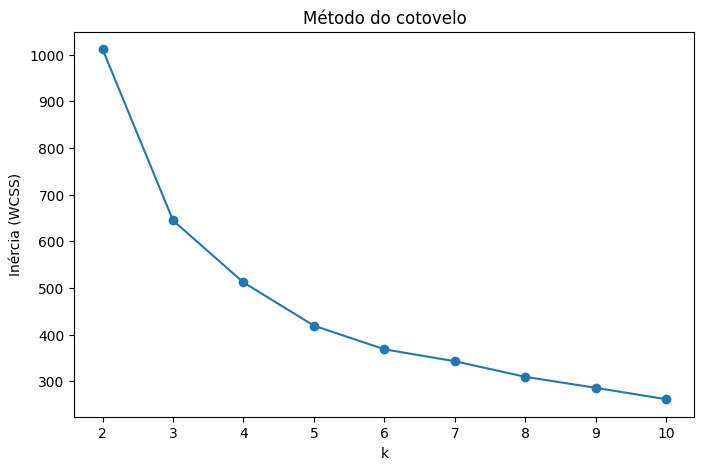

In [ ]:
inercias_false = calc_inercias(df_transformed_false, range(2, 11))
plot_cotovelo(range(2, 11), inercias_false)

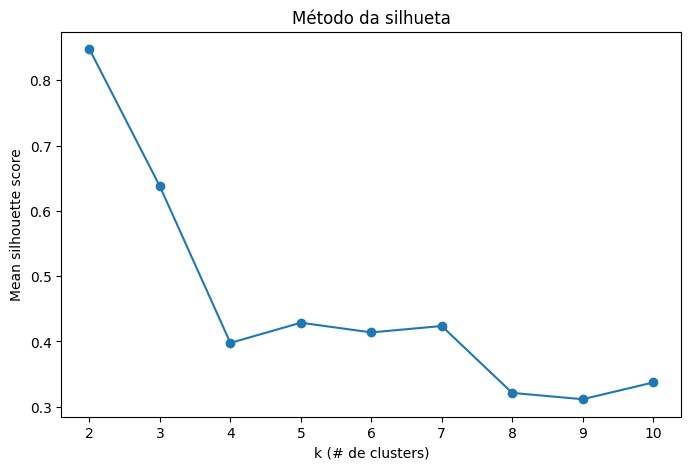

In [ ]:
lista_silhuetas_false = calc_silhueta(df_transformed_false, range(2, 11))
plot_silhueta(df_transformed_false, list(range(2, 11)))

In [ ]:
estimador_false = KMeans(n_clusters = 3, random_state=42)
modelo_false = estimador_false.fit(df_transformed_false)

In [ ]:
df_transformed_false['class'] = modelo_false.labels_
df_transformed_false['class'].value_counts()

class
0    8620
1     928
2     874
Name: count, dtype: int64

In [ ]:
df_merged_false = df[df['Revenue'] == False].merge(df_transformed_false['class'], how='left', left_index=True, right_index=True)

df_merged_false.drop(columns=['Month', 'VisitorType', 'Browser', 'OperatingSystems', 'Region', 'TrafficType', 'Weekend']).groupby('class').mean()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Revenue
class,,,,,,,,,,,
0,2.416009,84.814874,0.511601,34.362511,31.303248,1180.552704,0.009541,0.032570,2.291925,0.003387,0.0
1,0.037716,1.251904,0.010776,0.036853,2.721983,49.235557,0.179009,0.186896,0.000000,0.098707,0.0
2,1.384439,41.479927,0.330664,21.605284,30.782609,1063.338721,0.017728,0.045292,0.958184,0.677803,0.0


In [ ]:
df_merged_false.groupby('class')['VisitorType'].value_counts(normalize=True).unstack()

VisitorType,New_Visitor,Other,Returning_Visitor
class,,,
0,0.139907,0.006148,0.853944
1,0.031250,0.017241,0.951509
2,0.042334,NaN,0.957666


Por fim, a análise mais aprofundada do conjunto de sessões que não finalizou em transação permite a elaboração de medidas que potencializam as chances de uma sessão finalizar em transação. Sobre cada classe, podemos concluir e indicar:

- **Classe 0:** Sessões que visitaram mais páginas, assim como gastaram mais tempo nelas. Também é o grupo com maiores PageValues, mas bastante inferior em relação aos PageValues do grupo que finalizou em transação. Como medida para aumentar a chance de transação dessas sessões, seria interessante adotar algum mecanismo que encaminhe sessões com esse padrão de comportamento para páginas com maiores PageValues.

- **Classe 1:** Sessões cujos valores de páginas e tempo gasto são os menores, assim como o valor de PageValues. Seria interessante estabelecer uma segunda pesquisa para entender melhor o comportamento desse grupo, uma vez que as métricas apontam para a mais fraca das experiências na plataforma (poucas páginas acessadas, pouco tempo gasto, PageValues igual a zero).

- **Classe 2:** Sessões com valores intermediários para as métricas citadas anteriormente, mas com maiores proximidades de datas comerciais. Em relação às outras classes, esse grupo está com uma maior proximidade em relação às datas comemorativas. Vale mencionar que os valores médios para quantidades de páginas e tempo gastos dessa classe são próximos da classe 0, exceto pela quantia de páginas administrativas acessadas, sendo menor para a classe 2. Isso pode indicar uma dificuldade apresentada no momento cadastral de usuários, o que possivelmente potencializou a chance dessas sessões encerrarem sem transação.

# 3 - Modelo de Predição

## Alteração dos tipos do DataFrame e Dummies de variáveis categóricas

In [ ]:
dummies = pd.get_dummies(df['Month'], drop_first = True, dtype=int)

for column in dummies.columns:
    df[column] = dummies[column]

df = df.drop(columns = 'Month')

In [ ]:
dummies = pd.get_dummies(df['VisitorType'], drop_first = True, dtype=int)

for column in dummies.columns:
    df[column] = dummies[column]

df = df.drop(columns = 'VisitorType')

In [ ]:
df = df.astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  float64
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  float64
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  float64
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  OperatingSystems         12330 non-null  float64
 11  Browser                  12330 non-null  float64
 12  Region                   12330 non-null  float64
 13  TrafficType              12330 non-null  float64
 14  Weekend               

In [ ]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,May,June,Jul,Aug,Sep,Oct,Nov,Dec,Other,Returning_Visitor
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Testes dos modelos

###Param_grid sem balanceamento, KNN diversos com RandomizedSearchCV.

#### Melhores parâmetros:

knn__weights: distance </br>
knn__n_neighbors: 17 </br>
knn__metric: euclidean </br>
knn__algorithm: kd_tree </br>

#### 100% Treino.
#### Teste:        
            precision    recall  f1-score   support

    0.0       0.87      0.98      0.92      2055
    1.0       0.78      0.27      0.41       411

In [ ]:
lista_etapas = [("std_scaler", StandardScaler()),
                ("knn", KNeighborsClassifier())]

pipe = Pipeline(lista_etapas)

splitter = KFold(n_splits=10, shuffle=True, random_state=42)

accuracy = make_scorer(accuracy_score)

In [ ]:
X = df.drop(columns = 'Revenue')

In [ ]:
y = df['Revenue']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
param_grid = {"knn__weights" : ["distance", "uniform"],
              "knn__algorithm" : ['ball_tree', 'kd_tree', 'brute'],
              "knn__metric" : ["manhattan", "euclidean", "minkowski"],
              "knn__n_neighbors" : range(10, 100)}

rs_knn = RandomizedSearchCV(estimator=pipe,
                        param_distributions=param_grid,
                        scoring='recall',
                        cv=splitter,
                        n_iter=40,
                        verbose=10)

rs_knn.fit(X_train, y_train)


Melhores Parametros:

knn__weights: distance
knn__n_neighbors: 17
knn__metric: euclidean
knn__algorithm: kd_tree

[[2023   32]
 [ 298  113]]


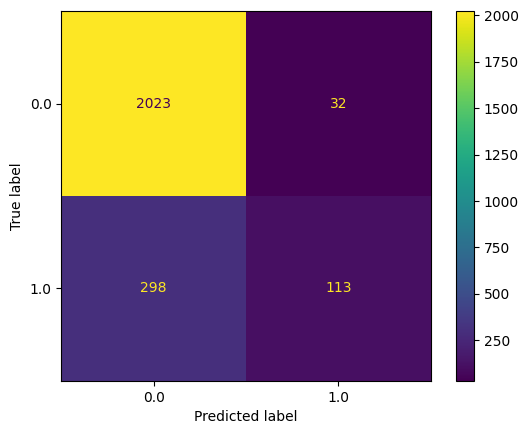

              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92      2055
         1.0       0.78      0.27      0.41       411

    accuracy                           0.87      2466
   macro avg       0.83      0.63      0.67      2466
weighted avg       0.86      0.87      0.84      2466


# ====================

[[8367    0]
 [   0 1497]]


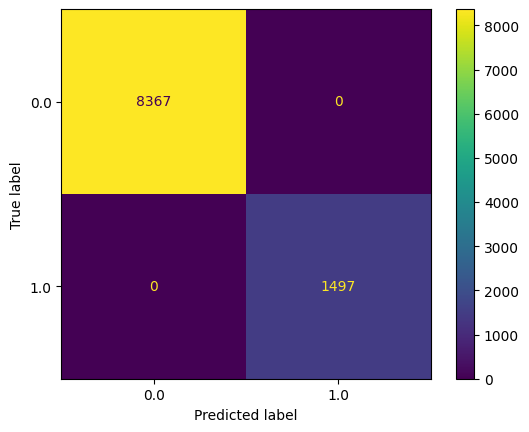

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8367
         1.0       1.00      1.00      1.00      1497

    accuracy                           1.00      9864
   macro avg       1.00      1.00      1.00      9864
weighted avg       1.00      1.00      1.00      9864



In [ ]:
print('\nMelhores Parametros:')
print()

for chave, valor in rs_knn.best_params_.items():
    print (f'{chave}: {valor}')

print()

y_pred_test = rs_knn.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

print("\n# ====================\n")

y_pred_train = rs_knn.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))

### Param_grid com balanceamento, KNN diversos com RandomizedSearchCV.

knn__weights: distance </br>
knn__n_neighbors: 22 </br>
knn__metric: manhattan </br>
knn__algorithm: brute </br>

####100% Treino.

#### Teste:

            precision    recall  f1-score   support

    0.0       0.75      0.76      0.76       391
    1.0       0.75      0.74      0.74       373

In [ ]:
rus = RandomUnderSampler(random_state=0)

X_resampled, y_resampled = rus.fit_resample(X, y)

print(sorted(Counter(y_resampled).items()))

[(0.0, 1908), (1.0, 1908)]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
param_grid = {"knn__weights" : ["distance", "uniform"],
              "knn__algorithm" : ['ball_tree', 'kd_tree', 'brute'],
              "knn__metric" : ["manhattan", "euclidean", "minkowski"],
              "knn__n_neighbors" : range(10, 100)}

rs_knn = RandomizedSearchCV(estimator=pipe,
                        param_distributions=param_grid,
                        scoring='recall',
                        cv=splitter,
                        n_iter=40,
                        verbose=10)

rs_knn.fit(X_train, y_train)


Melhores Parametros:

knn__weights: distance
knn__n_neighbors: 22
knn__metric: manhattan
knn__algorithm: brute

[[298  93]
 [ 97 276]]


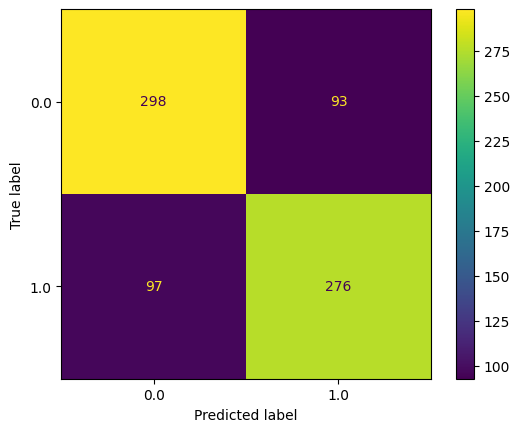

              precision    recall  f1-score   support

         0.0       0.75      0.76      0.76       391
         1.0       0.75      0.74      0.74       373

    accuracy                           0.75       764
   macro avg       0.75      0.75      0.75       764
weighted avg       0.75      0.75      0.75       764


# ====================

[[1517    0]
 [   0 1535]]


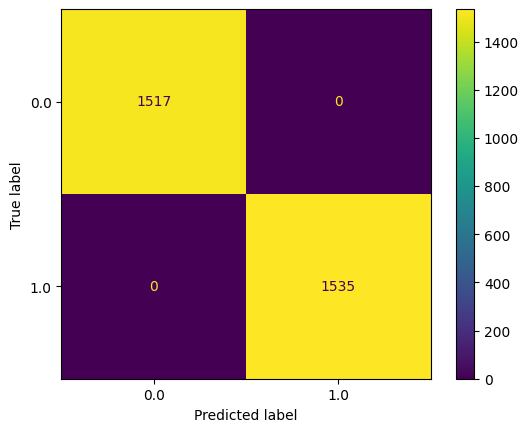

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1517
         1.0       1.00      1.00      1.00      1535

    accuracy                           1.00      3052
   macro avg       1.00      1.00      1.00      3052
weighted avg       1.00      1.00      1.00      3052



In [ ]:
print('\nMelhores Parametros:')
print()

for chave, valor in rs_knn.best_params_.items():
    print (f'{chave}: {valor}')

print()

y_pred_test = rs_knn.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

print("\n# ====================\n")

y_pred_train = rs_knn.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))

### AdaBoost Classifier com balanceamento

#### Treino:

            precision    recall  f1-score   support

    0.0       0.84      0.86      0.85      1517
    1.0       0.86      0.83      0.85      1535

#### Teste:

            precision    recall  f1-score   support

    0.0       0.83      0.84      0.84       391
    1.0       0.83      0.82      0.83       373

In [ ]:
def metricas_classificacao(estimator):

    #=================
    print("\nMétricas da avaliação de treino:")

    y_pred_train = estimator.predict(X_train) # predição sobre os dados de treinamento

    print(confusion_matrix(y_train, y_pred_train)) # matriz de confusão

    ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
    plt.show()

    print(classification_report(y_train, y_pred_train))

    #=================
    print("\nMétricas da avaliação de teste:")

    y_pred_test = estimator.predict(X_test) # predição sobre os dados de treinamento

    print(confusion_matrix(y_test, y_pred_test)) # matriz de confusão

    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
    plt.show()

    print(classification_report(y_test, y_pred_test))

In [ ]:
# pipeline para o Adaboost
pipe_ab = Pipeline([("ab", AdaBoostClassifier(random_state = 42))])

# por padrão, n_estimators = 50
pipe_ab.fit(X_train, y_train)

Pipeline(steps=[('ab', AdaBoostClassifier(random_state=42))])


Métricas da avaliação de treino:
[[1312  205]
 [ 255 1280]]


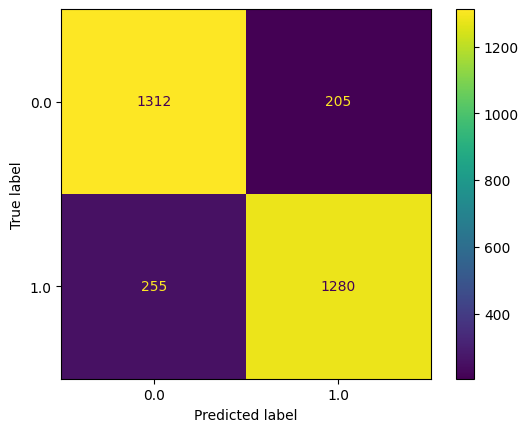

              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85      1517
         1.0       0.86      0.83      0.85      1535

    accuracy                           0.85      3052
   macro avg       0.85      0.85      0.85      3052
weighted avg       0.85      0.85      0.85      3052


Métricas da avaliação de teste:
[[330  61]
 [ 66 307]]


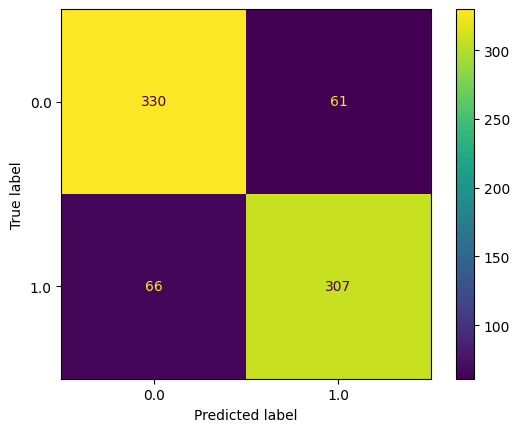

              precision    recall  f1-score   support

         0.0       0.83      0.84      0.84       391
         1.0       0.83      0.82      0.83       373

    accuracy                           0.83       764
   macro avg       0.83      0.83      0.83       764
weighted avg       0.83      0.83      0.83       764



In [ ]:
metricas_classificacao(pipe_ab)

### GradientBoostingClassifier com balanceamento

#### Treino:

            precision    recall  f1-score   support

    0.0       0.88      0.89      0.88      1517
    1.0       0.89      0.88      0.88      1535

#### Teste:

            precision    recall  f1-score   support

    0.0       0.85      0.85      0.85       391
    1.0       0.85      0.84      0.84       373

In [ ]:
pipe_gb = Pipeline([('gb', GradientBoostingClassifier(random_state=42))])

In [ ]:
pipe_gb.fit(X_train, y_train)

Pipeline(steps=[('gb', GradientBoostingClassifier(random_state=42))])


Métricas da avaliação de treino:
[[1355  162]
 [ 191 1344]]


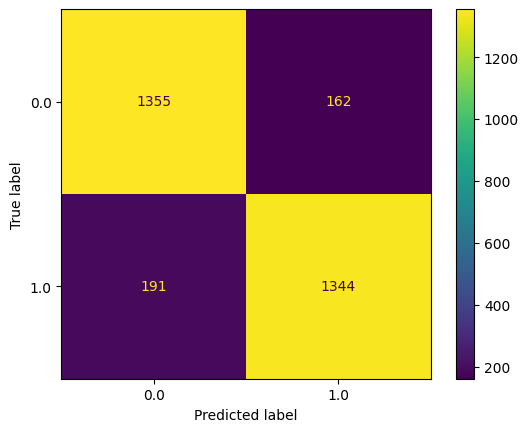

              precision    recall  f1-score   support

         0.0       0.88      0.89      0.88      1517
         1.0       0.89      0.88      0.88      1535

    accuracy                           0.88      3052
   macro avg       0.88      0.88      0.88      3052
weighted avg       0.88      0.88      0.88      3052


Métricas da avaliação de teste:
[[334  57]
 [ 61 312]]


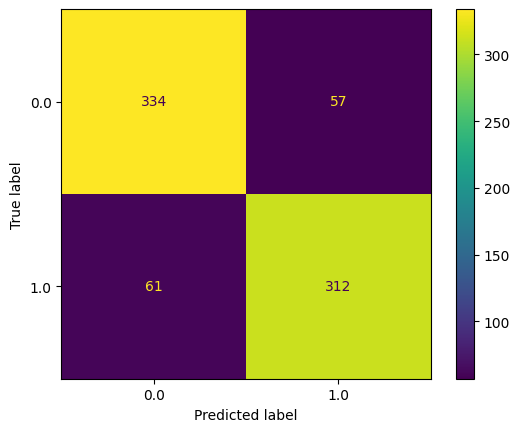

              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85       391
         1.0       0.85      0.84      0.84       373

    accuracy                           0.85       764
   macro avg       0.85      0.85      0.85       764
weighted avg       0.85      0.85      0.85       764



In [ ]:
metricas_classificacao(pipe_gb)

### XGBoostClassifier com balanceamento

            precision    recall  f1-score   support

    0.0       0.85      0.81      0.83       391
    1.0       0.81      0.86      0.83       373

In [ ]:
xgb = XGBClassifier()

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = xgb.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.81      0.83       391
         1.0       0.81      0.86      0.83       373

    accuracy                           0.83       764
   macro avg       0.83      0.83      0.83       764
weighted avg       0.83      0.83      0.83       764



### Avaliando importância das features no XGB

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

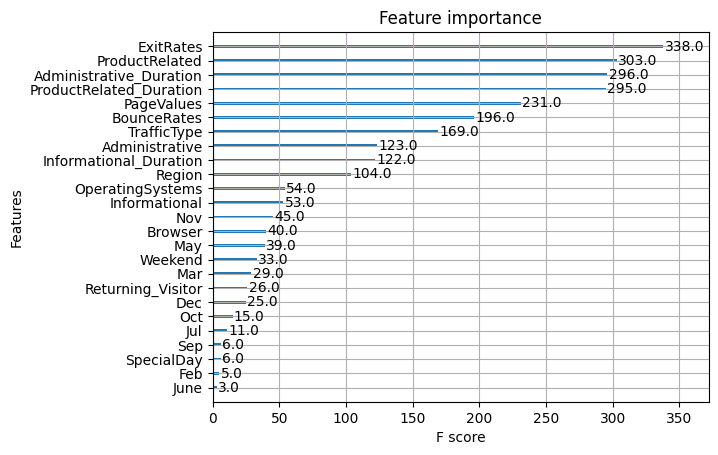

In [ ]:
plot_importance(xgb)

# Conclusão do Projeto

Ao longo do projeto, exploramos e analisamos o dataset "Online Shoppers Purchasing Intention" em busca de insights que auxiliem no entendimento do comportamento de usuário em uma sessão com e sem conversão em um e-commerce.

Através da **análise exploratória**:
- Observamos que a base de dados é desbalanceada, com aproximadamente 85% das sessões não finalizadas em compras.
- Identificamos correlações elevadas entre algumas variáveis, como BounceRates e ExitRates, e ProductRelated e ProductRelated_Duration.
- Constatamos que as sessões com conversão possuem, em média, um maior tempo de permanência nas páginas relacionadas a produtos.
- A época do ano, o tipo de tráfego e o sistema operacional utilizado pelo visitante também apresentaram influência na taxa de conversão.

Na **análise de segmentação**:

Utilizamos o algoritmo de Kmeans para agrupar sessões de um e-commerce com o objetivo de identificar padrões de comportamento dos usuários.

Inicialmente, o modelo mostrou uma eficácia clara em distinguir entre sessões que finalizaram em compra e aquelas que não finalizaram. Esta distinção inicial forneceu uma visão ampla e útil, mas limitada para uma compreensão detalhada dos diferentes tipos de comportamentos dentro de cada grupo.

Para aprofundar nossa análise, segmentamos as sessões em dois grupos principais: aquelas que finalizaram em compra e aquelas que não finalizaram em compra. Em seguida, aplicamos novamente o Kmeans em cada um desses grupos separadamente. Esta abordagem elucidou comportamentos distintos dentro de cada grupo, proporcionando insights mais refinados sobre os usuários do e-commerce.

Por fim, através da **análise de predição**:

Treinamos e testamos diversos modelos de classificação para identificar sessões com conversão, obtendo o melhor desempenho com o modelo Gradient Boosting Classifier, que atingiu uma recall da classe negativa de 85%.

Realizamos uma análise de importância das variáveis para o modelo, identificando que as variáveis mais relevantes para a predição são PageValues, ProductRelated_Duration, BounceRates e Administrative_Duration.

Com base nas análises e resultados do projeto, podemos concluir que:
- As características do comportamento do visitante em um e-commerce, como tempo de permanência nas páginas, engajamento com produtos específicos e taxa de saída, são indicadores importantes para a identificação de sessões com potencial de conversão.
- A aplicação de técnicas de machine learning, como o modelo XGBoost neste caso, pode auxiliar na tomada de decisões estratégicas para otimizar as taxas de conversão em e-commerces, direcionando ofertas personalizadas e promoções para os clientes com maior probabilidade de compra.

Ressaltamos que, para uma implementação completa e robusta em um ambiente real, seria necessário:
- Ajustar o modelo de machine learning com base em novos dados e análises periódicas.
- Considerar a integração do modelo com a plataforma do e-commerce para automatizar a segmentação dos clientes e a personalização das ofertas.
- Monitorar o impacto da aplicação do modelo nas taxas de conversão e realizar ajustes quando necessário.

Acreditamos que este projeto contribui para a compreensão dos fatores que influenciam a conversão em e-commerces e demonstra o potencial da aplicação de técnicas de machine learning para otimizar as vendas online.

# Referências

- Sakar,C. and Kastro,Yomi. (2018). Online Shoppers Purchasing Intention Dataset. UCI Machine Learning Repository. https://doi.org/10.24432/C5F88Q.

- Sakar, C.O., Polat, S.O., Katircioglu, M., & Kastro, Y. (2018). Real-time prediction of online shoppers’ purchasing intention using multilayer perceptron and LSTM recurrent neural networks. Neural Computing and Applications, 31, 6893 - 6908.